In [2]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
books = pd.read_csv('books.csv')
reatings = pd.read_csv('ratings.csv')

In [4]:
from sklearn.feature_extraction.text import TfidfTransformer

books["features"] = books["Title"] + " " + books["Author"] + " " + books["Genre"]
tfidf = TfidfVectorizer()
tfidf_matrix = tfidf.fit_transform(books["features"])
content_similarity = cosine_similarity(tfidf_matrix)

In [5]:
book_index = 0
similar_books = content_similarity[book_index].argsort()[::-1][1:4]
print("Content Based Recommendations for 'Harry Potter':")
print(books.iloc[similar_books]["Title"].tolist())

Content Based Recommendations for 'Harry Potter':
['The Hobbit', 'Percy Jackson', 'The Da Vinci Code']


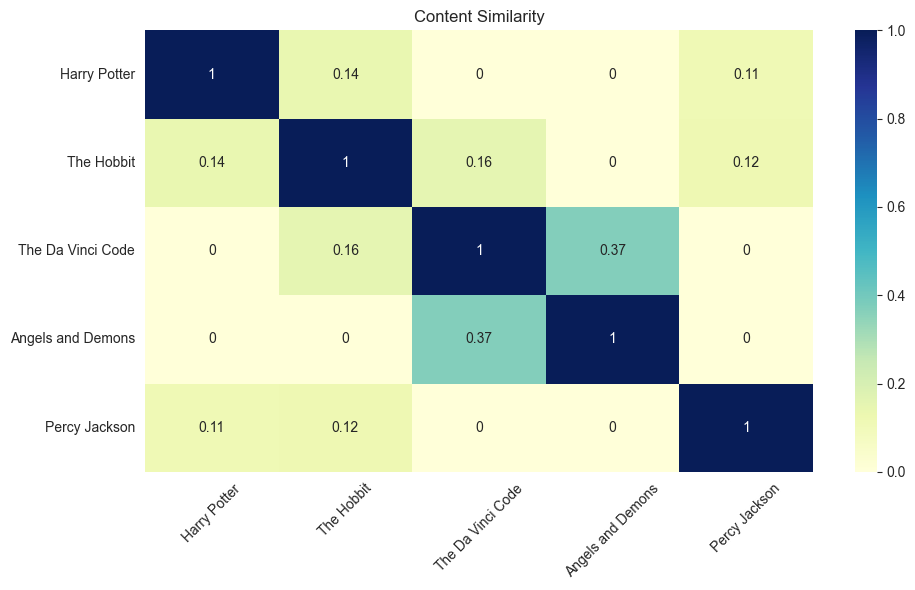

In [6]:
plt.figure(figsize=(10, 6))
sns.heatmap(content_similarity, xticklabels=books["Title"], yticklabels=books["Title"], annot=True, cmap="YlGnBu")
plt.title("Content Similarity")
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

In [7]:
user_item_matrix = reatings.pivot(index='User_ID', columns='Book_ID', values='Rating').fillna(0)
user_similarity = cosine_similarity(tfidf_matrix)

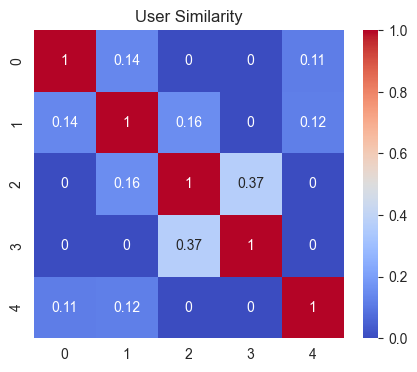

In [8]:
plt.figure(figsize=(5, 4))
sns.heatmap(user_similarity, annot=True, cmap='coolwarm')
plt.title("User Similarity")
plt.show()

In [14]:
# Suppose you have 5 users in similarity matrix
user_ids = [f'User{i+1}' for i in range(user_similarity.shape[0])]
user_sim_df = pd.DataFrame(user_similarity, index=user_ids, columns=user_ids)

# Get similar users to User1
similar_users = user_sim_df.loc['User1'].sort_values(ascending=False)[1:]
print("Users most similar to User 1:")
print(similar_users)


Users most similar to User 1:
User2    0.137189
User5    0.114512
User3    0.000000
User4    0.000000
Name: User1, dtype: float64


In [15]:
content_scores = content_similarity[book_index]
user_ratings = user_item_matrix.loc[1]
aligned_ratings = user_ratings.reindex(books['Book_ID']).fillna(0).values
hybrid_score = 0.6 * content_scores +0.4 * aligned_ratings

top_indices = np.argsort(hybrid_score)[::-1]
recommended_indices = [i for i in top_indices if i!=book_index][:3]

print("InHybrid Recommendations for User 1:")
print(books.iloc[recommended_indices]['Title'].tolist())

InHybrid Recommendations for User 1:
['The Hobbit', 'Percy Jackson', 'The Da Vinci Code']
